In [6]:
# Импорты
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [106]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


# **Задание 1**

Есть небольшой искусственный датасет: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/data
Необходимо прочитать его и представить в виде df

Качаем датасет

https://drive.google.com/file/d/1pYfM-NEWalIQM7V477-ijdYKbYGoNBZs/view?usp=sharing

In [ ]:
! gdown --id 1pYfM-NEWalIQM7V477-ijdYKbYGoNBZs

Читаем датасет и представляем его в виде df

In [107]:
df = pd.read_csv('/content/shopping_trends.csv')
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


# **Задание 2.1**

*На* основании данных из задания 1 необходимо составить максимальное(миним 5) кол-во гипотез о корреляциях между отдельными столбцами и проверить их (аналогично воршопу). При этом при составлении гипотез можно рассматривать не полный df, а именно выборки (например: "женщины старше 40 лет покапают в основном осенью")

## **Гипотеза 1**

<h3>Покупатели старше 50 лет тратят больше денег на одежду, чем молодые люди в возрасте от 20 до 30 лет </h3>

Выбираем из исходного датасета строки с покупателями, купившими одежду в категории "старше 50 лет" и "между 20 и 30 годами"

In [ ]:
df_old_persons_clothing = df[(df['Age'] > 50) & (df['Category'] == 'Clothing')]
df_young_persons_clothing = df[(df['Age'] >= 20) & (df['Age'] <= 30) & (df['Category'] == 'Clothing')]



Посчитаем средние значения по столбцу Purchase Amount (USD) для того, чтобы понять, в какой категории тратится больше денег на одежду

In [ ]:
average_spend_old = df_old_persons_clothing['Purchase Amount (USD)'].mean()
average_spend_young = df_young_persons_clothing['Purchase Amount (USD)'].mean()

print(f"Средние траты покупателей старше 50 лет: ${average_spend_old:.2f}")
print(f"Средние траты покупателей в возрасте 20-30 лет: ${average_spend_young:.2f}")

Средние траты покупателей старше 50 лет: $61.01
Средние траты покупателей в возрасте 20-30 лет: $59.96


Таким образом, покупатели старше 50 тратят больше денег на одежду, чем покупатели в возрасте от 20 до 30 лет. По исходным данным гипотеза подтверждается.

In [ ]:
print(f"Разница между средними тратами в категориях 'старше 50' и 'между 20 и 30': ${np.abs(average_spend_old-average_spend_young):.2f}")

Разница между средними тратами в категориях 'старше 50' и 'между 20 и 30': $1.05


## **Гипотеза 2**

<h3>Клиенты, предпочитающие оплату через PayPal, совершают покупки чаще, чем те, кто использует наличные</h3>

Отсортируем исходный датасет на df_paypal_preference и df_cash_preference

In [ ]:
df_paypal_preference = df[ df['Preferred Payment Method'] == 'PayPal']
df_cash_preference = df[ df['Preferred Payment Method'] == 'Cash' ]

Сгруппируем количество строк по столбцу Frequency of Purchases для df_paypal_preference, получим данным с частотой покупок по промежуткам времени

In [ ]:
paypal = pd.DataFrame(df_paypal_preference.groupby('Frequency of Purchases')['Preferred Payment Method'].count())
paypal

,Preferred Payment Method
Frequency of Purchases,
Annually,103
Bi-Weekly,88
Every 3 Months,100
Fortnightly,92
Monthly,97
Quarterly,103
Weekly,94


Сгруппируем количество строк по столбцу Frequency of Purchases для df_cash_preference, получим данным с частотой покупок по промежуткам времени

In [ ]:
cash = pd.DataFrame(df_cash_preference.groupby('Frequency of Purchases')['Preferred Payment Method'].count())
cash

,Preferred Payment Method
Frequency of Purchases,
Annually,82
Bi-Weekly,98
Every 3 Months,94
Fortnightly,93
Monthly,98
Quarterly,104
Weekly,101


Смерджим датасеты paypal и cash для того, чтобы оценить частоту покупок в каждой из категорий

In [ ]:
data = paypal.merge(cash, left_on='Frequency of Purchases', right_on='Frequency of Purchases')
data

,Preferred Payment Method_x,Preferred Payment Method_y
Frequency of Purchases,,
Annually,103,82
Bi-Weekly,88,98
Every 3 Months,100,94
Fortnightly,92,93
Monthly,97,98
Quarterly,103,104
Weekly,94,101


Таким образом, мы можем по каждой категории частоты покупок оценить количество покупок среди покупателей, которые пользуются либо Paypal, либо cash. Таким образом:
- Annually - чаще покупки совершаются с использованием Paypal
- Bi-Weekly - чаще покупки совершаются с использованием Cash
- Every 3 Months - чаще покупки совершаются с использованием Paypal
- Fortnightly - чаще покупки совершаются с использованием Cash
- Monthly - чаще покупки совершаются с использованием Cash
- Quarterly - чаще покупки совершаются с использованием Cash
- Weekly - чаще покупки совершаются с использованием Cash


Среднее количество покупок по категориям:

In [ ]:
print(f'Среднее количество покупок с помощью paypal: {data["Preferred Payment Method_x"].mean():.2f}')

Среднее количество покупок с помощью paypal: 96.71


In [ ]:
print(f'Среднее количество покупок с помощью cash: {data["Preferred Payment Method_y"].mean():.2f}')

Среднее количество покупок с помощью cash: 95.71


Таким образом, в среднем покупатели чаще совершают покупки с помощью Paypal. По исходным данным гипотеза подтверждается.

## **Гипотеза 3**

<h3>Большинство покупок обуви происходит весной</h3>

1 способ. Отсортируем датасет на 4 датасета по сезонам и категории Footwear

In [ ]:
df_footwear_purchases_winter = df[ (df['Category'] == 'Footwear') & (df['Season'] == 'Winter')]
df_footwear_purchases_spring = df[ (df['Category'] == 'Footwear') & (df['Season'] == 'Spring')]
df_footwear_purchases_summer = df[ (df['Category'] == 'Footwear') & (df['Season'] == 'Summer')]
df_footwear_purchases_fall = df[ (df['Category'] == 'Footwear') & (df['Season'] == 'Fall')]

Посмотрим на долю каждого сезона в общих продажах категории Footwear

In [ ]:
df_footwear_purchases = df[df['Category'] == 'Footwear']

In [ ]:
print(f'Доля продаж категории Footwear в сезоне Winter: {len(df_footwear_purchases_winter)/len(df_footwear_purchases):.3f}')
print(f'Доля продаж категории Footwear в сезоне Spring: {len(df_footwear_purchases_spring)/len(df_footwear_purchases):.3f}')
print(f'Доля продаж категории Footwear в сезоне Summer: {len(df_footwear_purchases_summer)/len(df_footwear_purchases):.3f}')
print(f'Доля продаж категории Footwear в сезоне Fall: {len(df_footwear_purchases_fall)/len(df_footwear_purchases):.3f}')

Доля продаж категории Footwear в сезоне Winter: 0.234
Доля продаж категории Footwear в сезоне Spring: 0.272
Доля продаж категории Footwear в сезоне Summer: 0.267
Доля продаж категории Footwear в сезоне Fall: 0.227


Следовательно, доля продаж в сезоне Spring занимает большую часть продаж в категории Footwear. Однако, доли продаж в сезонах Spring и Summer близки к равным - 0.272 и 0.267 соответственно. По исходным данным гипотеза подтверждается.

--------------------------------------------------------------------------------
2 способ. Сгруппируем датасет по категории Footwear

In [ ]:
df_footwear = df[ df['Category'] == 'Footwear']

Посчитаем количество продаж в каждом сезоне с помощью группировки

In [ ]:
df_footwear.groupby('Season')['Customer ID'].count()

Season
Fall      136
Spring    163
Summer    160
Winter    140
Name: Customer ID, dtype: int64

Таким образом, продаж Footwear в сезоне Spring больше всего. Таким образом, по исходным данным гипотеза подтверждается.

## **Гипотеза 4**

<h3>Покупатели, которые использовали промокод, чаще оставляют положительные отзывы</h3>

Разделим датасет на 2 группы по критерию применения промокода

In [ ]:
group_with_promo = df[df['Promo Code Used'] == 'Yes']
group_without_promo = df[df['Promo Code Used'] == 'No']

Подсчитаем среднее значение рейтинга отзыва в каждой из категорий

In [ ]:
mean_rating_with_promo = group_with_promo['Review Rating'].mean()
mean_rating_without_promo = group_without_promo['Review Rating'].mean()

In [ ]:
print(f"Средний рейтинг отзыва с промокодом: {mean_rating_with_promo:.5f}")
print(f"Средний рейтинг отзыва без промокода: {mean_rating_without_promo:.5f}")

Средний рейтинг отзыва с промокодом: 3.73965
Средний рейтинг отзыва без промокода: 3.75771


Таким образом, в среднем рейтинг без использования промокода выше, чем рейтинг с использованием промокода. Следовательно, по исходным данным гипотеза не подтверждается.

## **Гипотеза 5**

<h3>Клиенты из Oregon чаще выбирают бесплатную доставку</h3>

1 способ. По аналогии с 1 способом в проверке 4 гипотезы, определяем доли для каждой доставки и сравниваем значения

In [ ]:
df_shipping_type_free = df[ (df['Shipping Type'] == 'Free Shipping') & (df['Location'] == 'Oregon')]
df_shipping_type_express = df[ (df['Shipping Type'] == 'Express') & (df['Location'] == 'Oregon')]
df_shipping_type_nda = df[ (df['Shipping Type'] == 'Next Day Air') & (df['Location'] == 'Oregon')]
df_shipping_type_standard = df[ (df['Shipping Type'] == 'Standard') & (df['Location'] == 'Oregon')]
df_shipping_type_2days = df[ (df['Shipping Type'] == '2-Day Shipping') & (df['Location'] == 'Oregon')]
df_shipping_type_store_pickup = df[ (df['Shipping Type'] == 'Store Pickup') & (df['Location'] == 'Oregon')]

df_shipping_type = df[(df['Location'] == 'Oregon')]

print(f'Доля доставок в категории Free Shipping: {len(df_shipping_type_free)/len(df_shipping_type):.3f}')
print(f'Доля доставок в категории Express: {len(df_shipping_type_express)/len(df_shipping_type):.3f}')
print(f'Доля доставок в категории Next Day Air: {len(df_shipping_type_nda)/len(df_shipping_type):.3f}')
print(f'Доля доставок в категории Standard: {len(df_shipping_type_standard)/len(df_shipping_type):.3f}')
print(f'Доля доставок в категории 2-Day Shipping: {len(df_shipping_type_2days)/len(df_shipping_type):.3f}')
print(f'Доля доставок в категории Store Pickup: {len(df_shipping_type_store_pickup)/len(df_shipping_type):.3f}')

Доля доставок в категории Free Shipping: 0.149
Доля доставок в категории Express: 0.162
Доля доставок в категории Next Day Air: 0.176
Доля доставок в категории Standard: 0.162
Доля доставок в категории 2-Day Shipping: 0.257
Доля доставок в категории Store Pickup: 0.095


Наибольшую долю в доставке занимает категория 2-Day Shipping, а не Free Shipping. Таким образом, по исходным данным гипотеза не подтверждается.

2 способ. Отсортируем исходный датасет по покупателям из Oregon

In [ ]:
df_oregon = df[ df['Location'] == 'Oregon' ]

Подсчитаем количество покупателей в каждой категории доставки

In [ ]:
df_oregon.groupby('Shipping Type')['Customer ID'].count()

Shipping Type
2-Day Shipping    19
Express           12
Free Shipping     11
Next Day Air      13
Standard          12
Store Pickup       7
Name: Customer ID, dtype: int64

Наибольшее количество доставок - категория 2-Day Shipping, а не Free Shipping. Таким образом, по исходным данным гипотеза не подтверждается.

# **Задание 2.2**

Помимо гипотез, давайте найдем самый популярный товар, построим распределение покупателей по полу, определим какой пол(и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары. Определим есть ли зависимость между цветом одежды и сезоном. Так же посчитаем наш сезонный mau (уникальных пользователей за сезон) и его динамику. Так же давайте найдем самую популярную букву в названии одежды.

In [ ]:
# Найдем самый популярный товар
df['Item Purchased'].value_counts().sort_values(ascending=False).head(5)

Blouse     171
Jewelry    171
Pants      171
Shirt      169
Dress      166
Name: Item Purchased, dtype: int64

Таким образом, самые популярные товары - это Blouse, Jewelry и Pants

<Axes: >

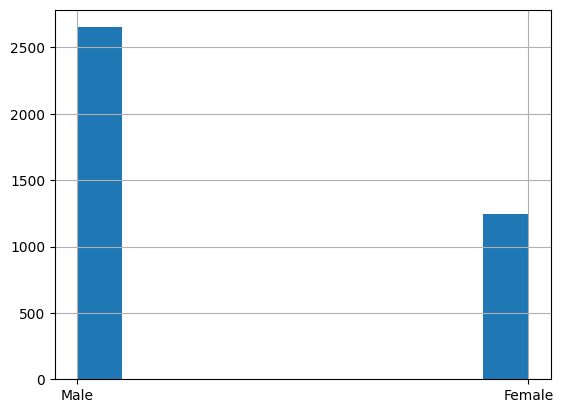

In [ ]:
# Построим распределение покупателей по полу
df['Gender'].hist()

Определим, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары

In [ ]:
# Найдём наибольшую стоимость товара
max_price = max(df['Purchase Amount (USD)'])
max_price

100

In [ ]:
df_expensive_good = df[ df['Purchase Amount (USD)'] == max_price]
df_expensive_good.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
42,43,20,Male,Coat,Outerwear,100,Tennessee,M,Beige,Spring,4.1,Yes,Bank Transfer,Free Shipping,Yes,Yes,15,PayPal,Annually
95,96,37,Male,Sneakers,Footwear,100,Missouri,L,Pink,Fall,3.8,Yes,PayPal,Free Shipping,Yes,Yes,48,PayPal,Monthly
193,194,36,Male,Belt,Accessories,100,North Dakota,S,Silver,Fall,3.0,Yes,PayPal,Standard,Yes,Yes,29,Venmo,Annually
204,205,24,Male,Sneakers,Footwear,100,Arizona,M,Yellow,Fall,4.0,Yes,PayPal,Store Pickup,Yes,Yes,35,Cash,Bi-Weekly
243,244,25,Male,Jewelry,Accessories,100,Kentucky,M,Olive,Winter,2.8,Yes,Credit Card,2-Day Shipping,Yes,Yes,4,Debit Card,Monthly


In [ ]:
# Определим какой пол покупает больше всего, чаще всего, самые дорогие товары
df_expensive_good.groupby('Gender')['Customer ID'].count()

Gender
Female    11
Male      25
Name: Customer ID, dtype: int64

Исходя из полученных данных, чаще всего самые дорогие товары покупают **мужчины**

In [ ]:
# Определим какой возраст покупает больше всего, чаще всего, самые дорогие товары
pd.DataFrame(df_expensive_good.groupby('Age')['Customer ID'].count().sort_values(ascending=False)).head(10)

,Customer ID
Age,
20,3
18,2
32,2
67,2
46,2
69,2
25,2
24,2
30,1


Исходя из полученных данных, чаще всего самые дорогие товары покупают люди в возрасте **20 лет**

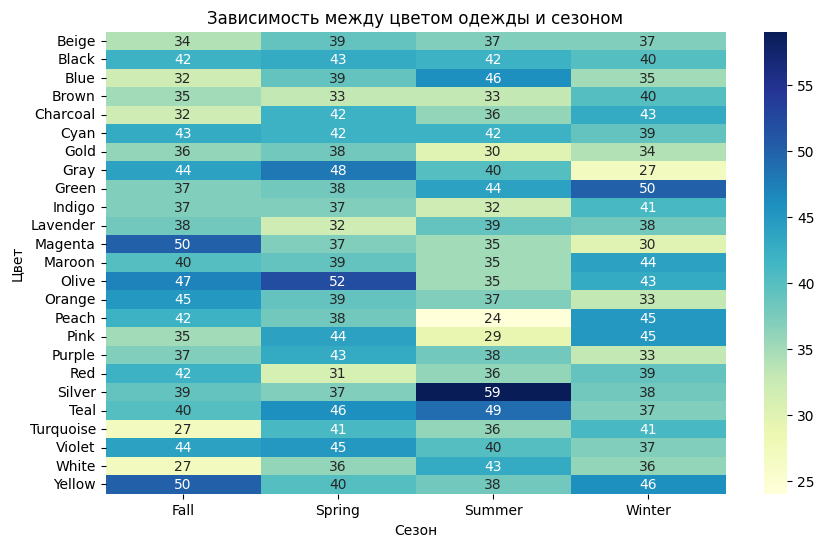

In [ ]:
# Определим зависимость между цветом одежды и сезоном
cross_tab = pd.crosstab(df['Color'], df['Season'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Сезон')
plt.ylabel('Цвет')
plt.title('Зависимость между цветом одежды и сезоном')
plt.show()


Исходя из полученных данных, можно заметить следующие зависимости между цветами и сезонами:
- Fall: прямая зависимость - Yellow, Magenta, Olive, обратная зависимость - Turquoise, White
- Spring: прямая зависимость - Olive, Gray, Teal, обратная зависимость - Red, Lavender, Brown
- Summer: прямая зависимость - Silver, Teal, Blue, обратная зависимость - Peach, Pink
- Winter: прямая зависимость - Green, Yellow, обратная зависимость - Gray, Magenta, Purple

In [ ]:
#  Посчитаем сезонный mau
seasonly_mau = df.groupby('Season')['Customer ID'].nunique()

print("Сезонный MAU:")
print(seasonly_mau)

Сезонный MAU:
Season
Fall      975
Spring    999
Summer    955
Winter    971
Name: Customer ID, dtype: int64


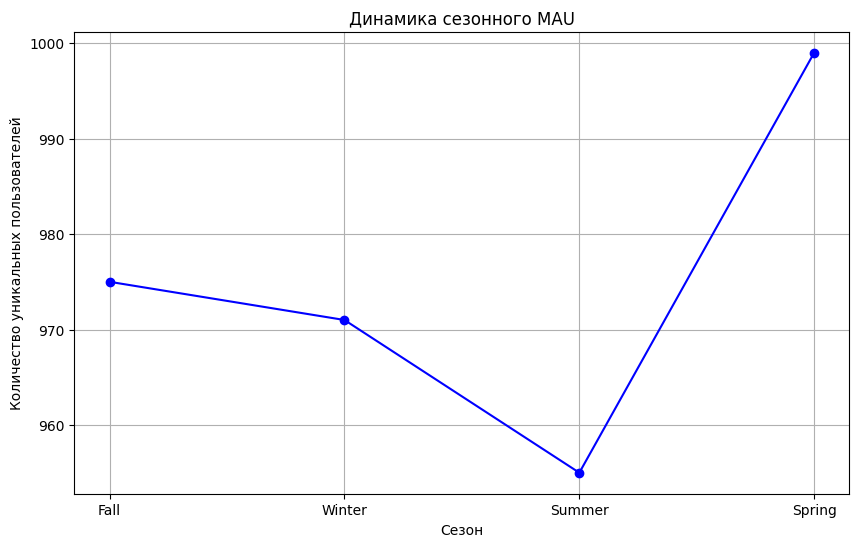

In [ ]:
# и его динамику
import matplotlib.pyplot as plt
indexes = ((seasonly_mau.index)[0],
          (seasonly_mau.index)[3],
          (seasonly_mau.index)[2],
          (seasonly_mau.index)[1])

values = ((seasonly_mau.values)[0],
          (seasonly_mau.values)[3],
          (seasonly_mau.values)[2],
          (seasonly_mau.values)[1])

plt.figure(figsize=(10, 6))
plt.plot(indexes, values, marker='o', linestyle='-', color='b')
plt.xlabel('Сезон')
plt.ylabel('Количество уникальных пользователей')
plt.title('Динамика сезонного MAU')
plt.grid(True)
plt.show()

In [ ]:
# найдем самую популярную букву в названии одежды
item_names = df['Item Purchased']
all_item_names = ' '.join(item_names)

all_item_names = all_item_names.lower()

letters = pd.Series(list(all_item_names))

letter_counts = letters.value_counts()

most_common_letter = letter_counts.idxmax()

print(f"Самая популярная буква в названиях одежды: {letter_counts.index[0]}")

Самая популярная буква в названиях одежды: s


# Задание 3

У нас есть данные о потреблении алкоголя о потреблнеии Алкоголя в мире https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption.

Давайте представим эти данные в виде df, где же люди пьют больше вина, пива и других спиртных напитков.

https://drive.google.com/file/d/1uWFZVfc-0TmbmB_3ZkJxMS9CzXdGhSZH/view?usp=sharing

In [ ]:
! gdown --id 1uWFZVfc-0TmbmB_3ZkJxMS9CzXdGhSZH

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1uWFZVfc-0TmbmB_3ZkJxMS9CzXdGhSZH
To: /content/drinks.csv
100% 4.38k/4.38k [00:00<00:00, 11.3MB/s]


In [ ]:
df = pd.read_csv('/content/drinks.csv')

In [ ]:
print(df[df['beer_servings'] == max(df['beer_servings'])]['country'])
print(df[df['spirit_servings'] == max(df['spirit_servings'])]['country'])
print(df[df['wine_servings'] == max(df['wine_servings'])]['country'])
print(df[df['total_litres_of_pure_alcohol'] == max(df['total_litres_of_pure_alcohol'])]['country'])

117    Namibia
Name: country, dtype: object
68    Grenada
Name: country, dtype: object
61    France
Name: country, dtype: object
15    Belarus
Name: country, dtype: object


# Задание 4

У нас есть Полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Давайте представим эти данные в виде df и определим:

- число проклятий, летальных исходов и их отношение по фильмам

- частота употребления конкретных прокрятий

- распределение времени между проклятиями

https://drive.google.com/file/d/1bByHAgKRGTqI2ntPd0_17x_2wjmGXfrA/view?usp=sharing

In [3]:
! gdown --id 1bByHAgKRGTqI2ntPd0_17x_2wjmGXfrA

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1bByHAgKRGTqI2ntPd0_17x_2wjmGXfrA
To: /content/tarantino.csv
100% 62.0k/62.0k [00:00<00:00, 68.3MB/s]


In [7]:
# загружаем датасет
df = pd.read_csv('/content/tarantino.csv')

In [8]:
df_type_word = df[ df['type'] == 'word' ]
df_type_death = df[ df['type'] == 'death' ]

In [12]:
# число проклятий и летальных исходов
print(len(df_type_word))
print(len(df_type_death))

1704
190


In [9]:
# распределение проклятий по фильмам
df_type_word.groupby('movie')['type'].count()

movie
Django Unchained       262
Inglorious Basterds     58
Jackie Brown           368
Kill Bill: Vol. 1       57
Kill Bill: Vol. 2       69
Pulp Fiction           469
Reservoir Dogs         421
Name: type, dtype: int64

In [10]:
# распределение смертей по фильмам
df_type_death.groupby('movie')['type'].count()

movie
Django Unchained       47
Inglorious Basterds    48
Jackie Brown            4
Kill Bill: Vol. 1      63
Kill Bill: Vol. 2      11
Pulp Fiction            7
Reservoir Dogs         10
Name: type, dtype: int64

In [18]:
# частота употребления проклятий
df.groupby('word')['movie'].count().sort_values(ascending=False)

word
fucking          407
shit             221
fuck             213
n-word           179
ass              140
goddamn          113
motherfucker      70
bitch             64
hell              45
damn              37
motherfucking     27
fucked            25
motherfuckers     15
bullshit          15
dick              14
pussy             11
asshole           10
bastard           10
bitches            9
fucker             8
dicks              5
negro              5
assholes           5
shitty             4
asses              4
fucks              3
damned             3
shithead           3
horseshit          2
japs               2
gooks              2
shitload           2
wetback            2
cunt               2
cocksucker         2
gook               1
squaw              1
slut               1
slope              1
asshead            1
shitting           1
shittiest          1
bastards           1
shitless           1
chickenshit        1
cockblockery       1
cunts              1
goddamne

<Axes: >

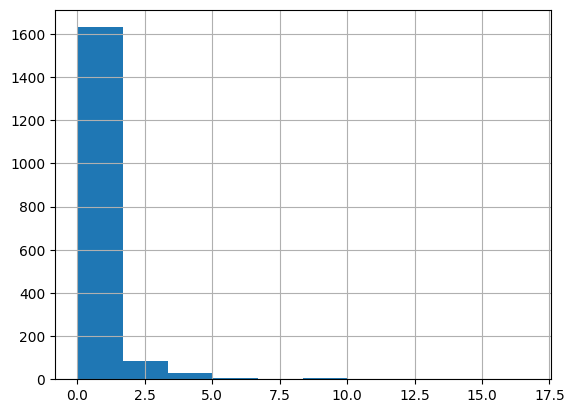

In [17]:
# распределение времени между проклятиями
df['time_diff'] = df['minutes_in'].diff()
df['time_diff'] = df[df['time_diff'] > 0]['time_diff']
df['time_diff'].hist()